#### Problem Statement: Pick up the following stocks and generate forecasts accordingly Stocks:

1. NASDAQ.AAPL

2. NASDAQ.ADP

3. NASDAQ.CBOE

4. NASDAQ.CSCO

5. NASDAQ.EBAY


In [1]:
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt
%matplotlib inline

<ipython-input-1-f1dc2c7e394e>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
df=pd.read_csv('data_stocks.csv')

In [3]:
df.head(2)

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.33,143.68,129.63,82.04,102.23,85.22,59.76,121.52,...,84.37,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.00,53.35
1,1491226260,2364.1001,42.36,143.70,130.32,82.08,102.14,85.65,59.84,121.48,...,84.37,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.77,53.35


In [4]:
df['DATE'].dtypes

dtype('int64')

In [5]:
df['DATE']=pd.to_datetime(df['DATE'], unit='s')

In [6]:
df['DATE'].tail()

41261   2017-08-31 19:56:00
41262   2017-08-31 19:57:00
41263   2017-08-31 19:58:00
41264   2017-08-31 19:59:00
41265   2017-08-31 20:00:00
Name: DATE, dtype: datetime64[ns]

In [7]:
df.index=df['DATE']

In [8]:
df.drop('DATE',axis = 1,inplace=True)

In [9]:
df.tail()

,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
DATE,,,,,,,,,,,,,,,,,,,,,
2017-08-31 19:56:00,2472.22,44.72,164.11,155.090,83.67,106.565,114.49,47.150,142.425,45.130,...,99.675,99.53,49.485,40.955,76.360,32.285,62.110,76.88,114.31,62.7250
2017-08-31 19:57:00,2471.77,44.73,164.12,155.160,83.65,106.590,114.52,47.150,142.450,45.130,...,99.730,99.63,49.480,40.960,76.370,32.295,62.100,76.90,114.33,62.7100
2017-08-31 19:58:00,2470.03,44.74,164.01,155.065,83.62,106.520,114.47,47.150,142.330,45.135,...,99.735,99.64,49.495,40.940,76.315,32.290,62.090,76.88,114.31,62.6850
2017-08-31 19:59:00,2471.49,44.71,163.88,154.960,83.58,106.400,114.33,47.135,142.170,45.065,...,99.700,99.63,49.485,40.925,76.300,32.275,62.075,76.83,114.23,62.6301
2017-08-31 20:00:00,2471.49,44.74,163.98,155.160,83.69,106.470,114.46,47.150,142.410,45.120,...,99.670,99.64,49.490,40.940,76.320,32.270,62.070,76.81,114.28,62.6800


In [10]:
df_AAPL = df[['NASDAQ.AAPL']].copy()

In [11]:
df_AAPL.tail()

,NASDAQ.AAPL
DATE,
2017-08-31 19:56:00,164.11
2017-08-31 19:57:00,164.12
2017-08-31 19:58:00,164.01
2017-08-31 19:59:00,163.88
2017-08-31 20:00:00,163.98


In [12]:
df_AAPL.count()

NASDAQ.AAPL    41266
dtype: int64

<AxesSubplot:xlabel='DATE'>

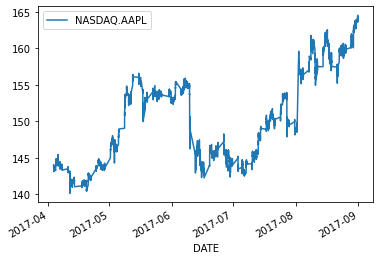

In [13]:
df_AAPL.plot()

Stationary means mean,variance and covariance is constant over periods.

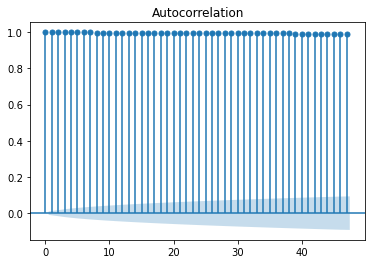

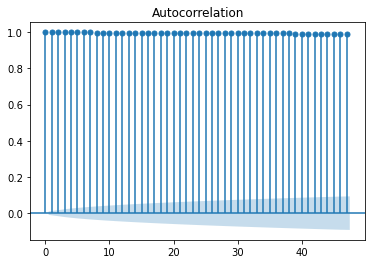

In [14]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df_AAPL)

###### Converting series to stationary

In [15]:
df_AAPL.shift(1)

,NASDAQ.AAPL
DATE,
2017-04-03 13:30:00,NaN
2017-04-03 13:31:00,143.6800
2017-04-03 13:32:00,143.7000
2017-04-03 13:33:00,143.6901
2017-04-03 13:34:00,143.6400
...,...
2017-08-31 19:56:00,164.1400
2017-08-31 19:57:00,164.1100
2017-08-31 19:58:00,164.1200


In [16]:
X = df_AAPL.values
train = X[0:28886] # 27 data as train data
test = X[28886:] # 9 data as test data
print(train.size)
print(test.size)
predictions = []

28886
12380


#### ARIMA Model

In [17]:
from statsmodels.tsa.arima_model import ARIMA

In [18]:
import itertools
p=d=q=range(0,6)
pdq=list(itertools.product(p,d,q))

###### My system not able to run and getting hang wwhile I run the below code coz of low configuratios

In [ ]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(train, order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 170326.9720446082
(0, 0, 1) 131018.03599865359
(0, 0, 2) 95780.67244459329
(0, 0, 3) 67525.18962516474
(0, 0, 4) 45787.34709203329
(0, 1, 0) -64708.71200636141
(0, 1, 1) -64706.87731534064
(0, 1, 2) -64718.28609667193
(0, 1, 3) -64719.67999909299
(0, 1, 4) -64724.74650243383
(0, 1, 5) -64723.273957570855
(0, 2, 0) -44617.132207470146
(0, 2, 1) -64678.289288177024
(0, 2, 2) -64676.47207188736


In [ ]:
#p,d,q 
#p -> Periods taken for auto regressive model
#d -> Integrated order, difference
#q -> Periods in moving average model
model_arima = ARIMA(train, order=(4,1,4))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

In [ ]:
predictions = model_arima_fit.forecast(steps=12380)[0]
predictions

In [ ]:
plt.plot(test)
plt.plot(predictions, color='red')

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test,predictions)

##### The above forecasting done for NASDAQ.AAPL. Similar can be done for other stocks.